## Exploratory Data Analysis and statistical and descriptive analytics

### First step

In [1]:
#Import Libraries and load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
#Load the dataset
df = pd.read_csv("dataset/datasetcleaned.csv", encoding="latin1")

C:\Users\david\AppData\Local\Temp\ipykernel_5476\1405673562.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### General questions about the dataset

Inspect the first rows, dimensions and variable types.

In [4]:
# How do the first rows of the dataset look like? 
df.head()

,Country,Region,DataYear,ClassGrade,Gender,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
0,USA,CA,2018,12,Female,17.0,Left-Handed,167,25.3,160,...,10,30,20.0,A lot,Graduate degree,Pop,Telepathy,Healthy,Relative,"Wildlife, animals"
1,USA,CA,2016,12,Female,17.0,Right-Handed,57,24,149,...,8,0,5.0,A lot,Graduate degree,Rap/Hip hop,Telepathy,Healthy,Relative,Environment
2,USA,CA,2016,4,Male,17.0,Left-Handed,168,24,170,...,1,0,2.0,Some,Graduate degree,Rock and roll,Telepathy,Happy,Relative,Health
3,USA,CA,2023,12,Male,16.0,Right-Handed,180,29.6,184,...,4,7,1.0,A lot,Graduate degree,Reggae,Fly,Happy,Relative,"Wildlife, animals"
4,USA,CA,2017,7,Female,12.0,Ambidextrous,154,10.5,64,...,3,0,2.0,Some,Some college,Pop,Fly,Happy,Relative,"Wildlife, animals"


In [48]:
# What are the dimensions of the dataset?
print("What are the dimensions of the dataset?")
print(df.shape)

What are the dimensions of the dataset?
(860, 60)


In [49]:
# How many variables of each data type do we have in the dataset?
print(
    df
    .dtypes
    .value_counts()
)

object     52
int64       5
float64     3
Name: count, dtype: int64


In [50]:
# Which columns are of each data type?
data_types = df.columns.to_series().groupby(df.dtypes).groups

print("Data Type            | Columns")
print("-----------------------------------")
for types, columns in data_types.items():
    columns_str = ', '.join(columns)
    types_str = str(types)
    print(f"{types_str:<20} | {columns_str}")

Data Type            | Columns
-----------------------------------
int64                | DataYear, ClassGrade, Importance_reducing_pollution, Sleep_Hours_Non_Schoolnight, Paid_Work_Hours
float64              | Ageyears, Reaction_time, Work_At_Home_Hours
object               | Country, Region, Gender, Handed, Height_cm, Footlength_cm, Armspan_cm, Languages_spoken, Travel_to_School, Travel_time_to_School, Score_in_memory_game, Favourite_physical_activity, Importance_recycling_rubbish, Importance_conserving_water, Importance_saving_energy, Importance_owning_computer, Importance_Internet_access, Left_Footlength_cm, Longer_foot, Index_Fingerlength_mm, Ring_Fingerlength_mm, Longer_Finger_Lefthand, Birth_month, Favorite_Season, Allergies, Vegetarian, Favorite_Food, Beverage, Favorite_School_Subject, Sleep_Hours_Schoolnight, Home_Occupants, Home_Internet_Access, Communication_With_Friends, Text_Messages_Sent_Yesterday, Text_Messages_Received_Yesterday, Hanging_Out_With_Friends_Hours, Talking_

### Statistical analysis

#### 1. How many students are right-handed, left-handed or ambidextrous?

In [51]:
# 1.How many students are right-handed, left-handed or ambidextrous? #console answers
print('How many students are right-handed, left-handed or ambidextrous?\n')

handed_counts = df['Handed'].value_counts() #Count the unique values in the 'Handed' column.
handed_counts_df = handed_counts.to_frame().reset_index()
handed_counts_df.columns = ['Lateralidad', 'Cantidad']
print("Number of students by type of laterality:")
print(tabulate(handed_counts_df, headers='keys', tablefmt='grid', showindex=False))
print('-'*50)
#----------------------------------------------------------------
# 1a.How many students are right-handed, left-handed or ambidextrous for each region? 
print("\nHow many students are right-handed, left-handed or ambidextrous for each region? ")
handed_by_region = df.groupby('Region')['Handed'].value_counts() # Group by region and count the unique laterality values within each group.
handed_by_region_table = handed_by_region.unstack().fillna(0) # Unstack the levels of the index to obtain a table
table_data = handed_by_region_table.reset_index().values.tolist() # Convert the table to a list of lists format
headers = ['Region', 'Ambidextrous', 'Left-handed', 'Right-handed'] # List of column headers
print("Number of students by type of laterality and region:") # Print the results
print(tabulate(table_data, headers=headers, tablefmt='grid'))

How many students are right-handed, left-handed or ambidextrous?

Number of students by type of laterality:
+---------------+------------+
| Lateralidad   |   Cantidad |
+===============+============+
| Right-Handed  |        771 |
+---------------+------------+
| Left-Handed   |         72 |
+---------------+------------+
| Ambidextrous  |         17 |
+---------------+------------+
--------------------------------------------------

How many students are right-handed, left-handed or ambidextrous for each region? 
Number of students by type of laterality and region:
+----------+----------------+---------------+----------------+
| Region   |   Ambidextrous |   Left-handed |   Right-handed |
+==========+================+===============+================+
| CA       |             10 |            56 |            524 |
+----------+----------------+---------------+----------------+
| TX       |              7 |            16 |            247 |
+----------+----------------+---------------+---

How many students are right-handed, left-handed or ambidextrous?



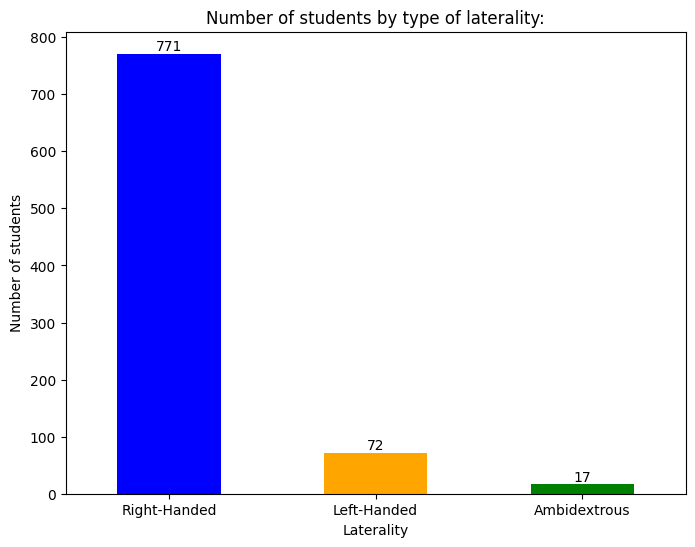

--------------------------------------------------
How many students are right-handed, left-handed or ambidextrous for each region? 


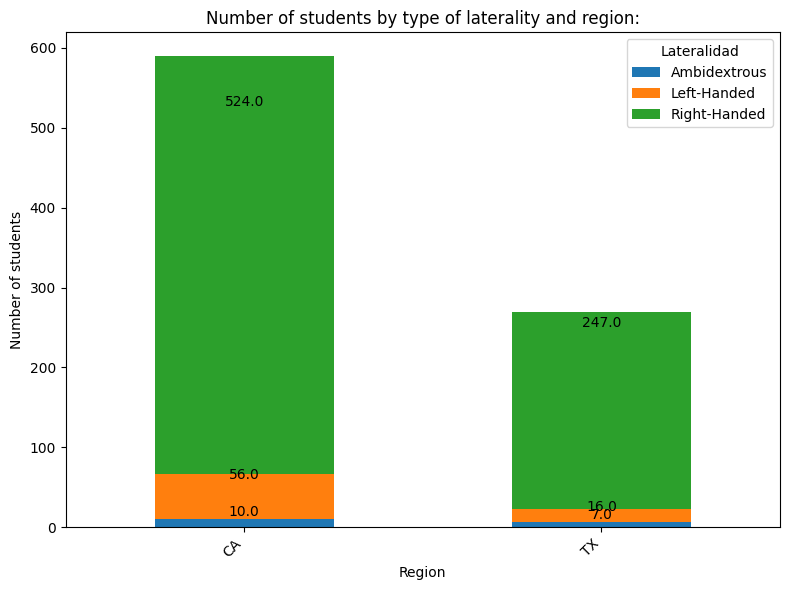

In [52]:
# 1.How many students are right-handed, left-handed or ambidextrous? #plot answers
print('How many students are right-handed, left-handed or ambidextrous?\n')

plt.figure(figsize=(8, 6)) # Plotting the results
ax = handed_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
for p in ax.patches: # Add the values in each bar
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Number of students by type of laterality:')
plt.xlabel('Laterality')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()
print('-'*50)
#----------------------------------------------------------------
# 1a.How many students are right-handed, left-handed or ambidextrous for each region? 
print("How many students are right-handed, left-handed or ambidextrous for each region? ")
handed_by_region = df.groupby(['Region', 'Handed']).size().unstack(fill_value=0) # Group by region and count the unique laterality values within each group.
ax = handed_by_region.plot(kind='bar', stacked=True, figsize=(8, 6)) # Plot the distribution of laterality by region.

for p in ax.patches: # Add the values in each bar
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Number of students by type of laterality and region:')
plt.xlabel('Region')
plt.ylabel('Number of students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lateralidad')
plt.tight_layout()
plt.show()

#### 2. How many students have longer right foot, left foot or equal?

In [53]:
#2. How many students have longer left foot, left foot or equal? Console Answers
foot_length_counts = df['Longer_foot'].value_counts().reset_index()# Count how many students have the longest each foot.
foot_length_counts.rename(columns={'Longer_foot': 'Foot', 'count': 'Count'}, inplace=True)
print("Number of students by type of laterality:")
print(tabulate(foot_length_counts, headers='keys', tablefmt='grid', showindex=False))# Print the results in a table format
print('-'*50)
# How many students have the longest left foot, left foot or equal in each region?
region_foot_length_counts = df.groupby(['Region', 'Longer_foot']).size().unstack(fill_value=0).reset_index()
print("Number of students by type of laterality and region:")
print(tabulate(region_foot_length_counts, headers='keys', tablefmt='grid', showindex=False))


Number of students by type of laterality:
+-------------+---------+
| Foot        |   Count |
+=============+=========+
| Same length |     505 |
+-------------+---------+
| Right foot  |     193 |
+-------------+---------+
| Left foot   |     162 |
+-------------+---------+
--------------------------------------------------
Number of students by type of laterality and region:
+----------+-------------+--------------+---------------+
| Region   |   Left foot |   Right foot |   Same length |
+==========+=============+==============+===============+
| CA       |         126 |          136 |           328 |
+----------+-------------+--------------+---------------+
| TX       |          36 |           57 |           177 |
+----------+-------------+--------------+---------------+


How many students have longer left foot, right foot or equal?



<Figure size 800x600 with 0 Axes>

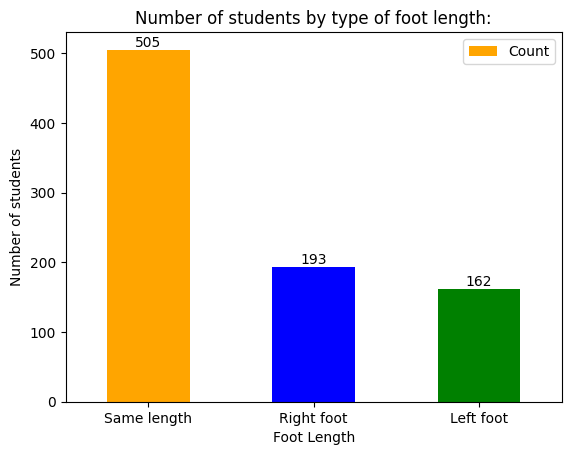

--------------------------------------------------
How many students have longer left foot, right foot or equal for each region?


<Figure size 1000x600 with 0 Axes>

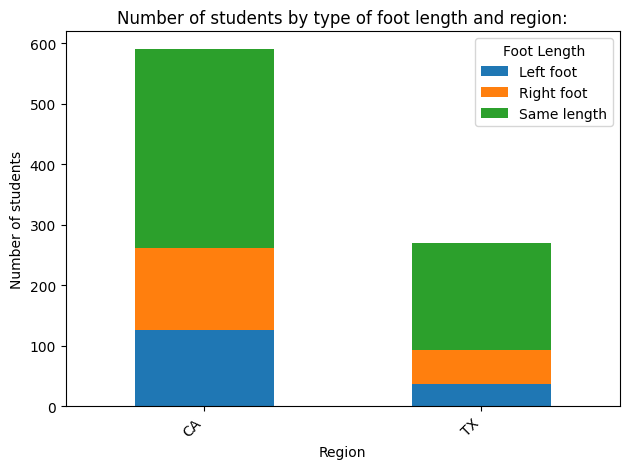

In [54]:
# 2.How many students have longer left foot, left foot or equal? #plot answers
print('How many students have longer left foot, right foot or equal?\n')

plt.figure(figsize=(8, 6))
ax = foot_length_counts.plot(kind='bar', x='Foot', y='Count', color=['orange', 'blue', 'green']) # Plot the results
for p in ax.patches: # Add the values in each bar
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Number of students by type of foot length:')
plt.xlabel('Foot Length')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()
print('-'*50)

#----------------------------------------------------------------
# 2a.How many students have longer left foot, right foot or equal for each region? 
print("How many students have longer left foot, right foot or equal for each region?")
foot_length_by_region = df.groupby(['Region', 'Longer_foot']).size().unstack(fill_value=0) # Group by region and count the unique foot length values within each group.
plt.figure(figsize=(10, 6))
ax = foot_length_by_region.plot(kind='bar', stacked=True) # Plot the distribution of foot length by region.


plt.title('Number of students by type of foot length and region:')
plt.xlabel('Region')
plt.ylabel('Number of students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Foot Length')
plt.tight_layout()
plt.show()

#### 3. What is the month in which the most students of those participating in the School Census were born in each state?

In [55]:
# 3.What is the month in which the most students of those participating in the School Census were born in each state? #Console answers
print('What is the month in which the most students of those participating in the School Census were born in each state?\n')

def most_common_month(group): # Define a custom function to obtain the most common month in each group.
    return group['Birth_month'].value_counts().idxmax()

# Apply the custom function to obtain the most common month by state.
most_common_birth_month_by_region = df.groupby('Region')['Birth_month'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_month')
print("Most common month of birth by state:") # Print the results
print(tabulate(most_common_birth_month_by_region, headers='keys', tablefmt='grid', showindex=False))

What is the month in which the most students of those participating in the School Census were born in each state?

Most common month of birth by state:
+----------+---------------------+
| Region   | Most_common_month   |
+==========+=====================+
| CA       | June                |
+----------+---------------------+
| TX       | October             |
+----------+---------------------+


#### 4. What is the favorite station of students participating in the School Census in each state?

In [60]:
# 4.What is the favorite station of students participating in the School Census in each state? #Console answers
print('What is the favorite station of students participating in the School Census in each state?\n')
most_common_station_by_region = df.groupby('Region')['Favorite_Season'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_favorite_station')
print("Most common favorite station by state:") # Print the results
print(tabulate(most_common_station_by_region, headers='keys', tablefmt='grid', showindex=False))

What is the favorite station of students participating in the School Census in each state?

Most common favorite station by state:
+----------+--------------------------------+
| Region   | Most_common_favorite_station   |
+==========+================================+
| CA       | Summer                         |
+----------+--------------------------------+
| TX       | Fall                           |
+----------+--------------------------------+


#### 5. What is the favorite drink of students participating in the School Census in each state?

In [57]:
# 5.What is the favorite drink of students participating in the School Census in each state?
print('What is the favorite drink of students participating in the School Census in each state?\n')
most_common_drink_by_region = df.groupby('Region')['Beverage'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_beverage')
print("Most common favorite beverage by state:") # Print the results
print(tabulate(most_common_drink_by_region, headers='keys', tablefmt='grid', showindex=False))

What is the favorite drink of students participating in the School Census in each state?

Most common favorite beverage by state:
+----------+------------------------+
| Region   | Most_common_beverage   |
+==========+========================+
| CA       | Water                  |
+----------+------------------------+
| TX       | Water                  |
+----------+------------------------+


#### 6. Build a histogram with the variable "time the student works with pay in the week (measured in hours)" and from this graph answer the following questions:

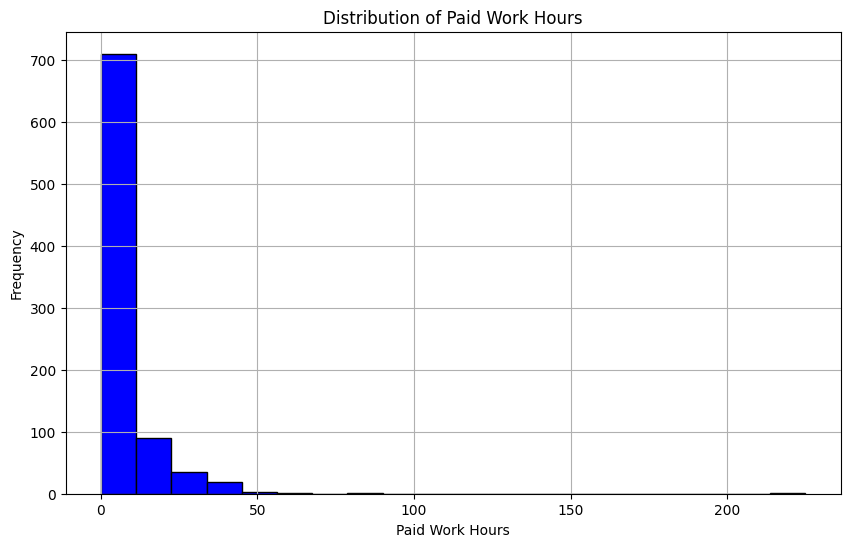

In [62]:
# Build the histogram of Paid_Work_Hours
plt.figure(figsize=(10, 6))
plt.hist(df['Paid_Work_Hours'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Paid Work Hours')
plt.xlabel('Paid Work Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [2]:
# Questions 1 - 6

# 1. Percentage of students working maximum 13 hours per week with pay
percentage_less_than_13 = len(df[df['Paid_Work_Hours'] <= 13]) / len(df) * 100

# 2. Percentage of students working minimum 3 hours per week with pay
percentage_greater_than_3 = len(df[df['Paid_Work_Hours'] >= 3]) / len(df) * 100

# 3. Minimum value of paid work hours corresponding to the 20th percentile
percentile_20 = np.percentile(df['Paid_Work_Hours'], 20)

# 4. Maximum value of paid work hours corresponding to the 80th percentile
percentile_80 = np.percentile(df['Paid_Work_Hours'], 80)

# 5. Interval where the mode lies (range of the bin with the highest frequency)
# Using the previously constructed histogram to find the bin with the highest frequency
hist, bins = np.histogram(df['Paid_Work_Hours'], bins=20)
mode_bin_index = np.argmax(hist)
mode_interval = (bins[mode_bin_index], bins[mode_bin_index + 1])

# 6. Maximum value of paid work hours corresponding to the 50th percentile (median)
median = np.percentile(df['Paid_Work_Hours'], 50)

# 7. Mean and standard deviation of paid work hours
mean_paid_work_hours = df['Paid_Work_Hours'].mean()
std_dev_paid_work_hours = df['Paid_Work_Hours'].std()

# 8. Type of skewness (positive, negative, or symmetric)
skewness = df['Paid_Work_Hours'].skew()
if skewness > 0:
    skew_type = 'Positive (left-skewed)'
elif skewness < 0:
    skew_type = 'Negative (right-skewed)'
else:
    skew_type = 'Symmetric'

# Display the results
print("1. Percentage of students working maximum 13 hours per week with pay: {:.2f}%".format(percentage_less_than_13))
print("2. Percentage of students working minimum 3 hours per week with pay: {:.2f}%".format(percentage_greater_than_3))
print("3. Minimum value of paid work hours corresponding to the 20th percentile: {:.2f}".format(percentile_20))
print("4. Maximum value of paid work hours corresponding to the 80th percentile: {:.2f}".format(percentile_80))
print("5. Interval where the mode lies: ({:.2f}, {:.2f})".format(mode_interval[0], mode_interval[1]))
print("6. Maximum value of paid work hours corresponding to the 50th percentile (median): {:.2f}".format(median))
print("7. Mean of paid work hours per week: {:.2f}, Standard deviation: {:.2f}".format(mean_paid_work_hours, std_dev_paid_work_hours))
print("8. Skewness type of the distribution of paid work hours: {}".format(skew_type))


1. Percentage of students working maximum 13 hours per week with pay: 84.19%
2. Percentage of students working minimum 3 hours per week with pay: 32.21%
3. Minimum value of paid work hours corresponding to the 20th percentile: 0.00
4. Maximum value of paid work hours corresponding to the 80th percentile: 10.00
5. Interval where the mode lies: (0.00, 11.25)
6. Maximum value of paid work hours corresponding to the 50th percentile (median): 0.00
7. Mean of paid work hours per week: 5.40, Standard deviation: 12.33
8. Skewness type of the distribution of paid work hours: Positive (left-skewed)



--- 